<a target="_blank" href="https://colab.research.google.com/github/IngCarlaPezzone/Call_center_analysis/blob/main/Call_center_analisis.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

# Análisis de operaciones de Call Center de Banco

## 1. Introducción

Se solicitó el análisis de las operaciones del Call Center del Anonymous Bank de Israel con el objetivo de proponer mejoras en:
* Eficiencia operativa, proponiendo mejoras operativas.
* Mejorar la satisfacción del cliente, cumpliendo los SLA comprometidos.
* Brindar una herramienta para la gestión y la toma de decisiones a los managers del Call Center.
En específico se solicita definir, construir y presentar un Dashboard que permita medir los niveles de calidad de servicios, eficiencia y productividad del Call Center. 

Para ello, en primer lugar se realizó la carga de los datos proporcionados para luego proceder a la limpieza y análisis exploratorio de cada una de las variables. A continuación se resumen los principales hallazgos y se responden a las preguntas planteadas por los interesados, a saber:

* ¿Cuál es el nivel de servicio para los clientes Prioritarios? 
* ¿Damos un mejor servicio que a los clientes normales?
* ¿Qué volumen de llamadas atendemos? 
* ¿Cuáles son los cuellos de botella? ¿En qué días? ¿En qué bandas horarias?
* ¿Cómo es la eficiencia y productividad de nuestros agentes?
* ¿Hay clientes recurrentes en el uso del servicio?
* ¿Cuáles son los tipos de servicio más recurrentes?

Finalmente, se proponen algunas recomendaciones y conclusiones finales.

## 2. Descripción de los datos

Para este proyecto se proporcionó un conjunto de datos compuesto por **444448 registros** y **18 columnas** en formato **.csv**, el cuál se describe en el documento [Data_dictionary](Data_dictionary.md) y al cuál se le realizó la correspondiente limpieza y Análisis Exploratorio de Datos que se puede consultar en el siguiente documento [Call_center_eda](Call_center_eda.ipynb). De éste último documento se extráen las siguientes conclusiones.

### 2.1 Sobre el conjunto de datos

Los registros del conjunto de datos corresponde a las llamadas registradas durante los **12 meses** el **año 1999**. De las 18 variables proporcionadas, se eliminaron **startdate** porque no se tiene información sobre la misma y **server** dado que se encontró con gran cantidad de inconsistencias y desinformación. Luego, se crearon nuevas variables en función de las necesidades observadas a lo largo de la limpieza. Estas son:
* **id_unique**: tiene por objetivo ser un id único para cada registro dado que el conjunto no contaba con una variable de esta naturaleza. Se conformó por la concatenación de las variables *vru.line* y *call_id*.
* **month**: se creó a partir de **date** para facilitar el análisis mensual.
* **vru_entri_corr**, **vru_exit_corr** y **vru_time_corr**: son variables que corrigen a *vru_entri*, *vru_exit* y *vru_time* debido a que se encontraron algunas horas cargadas en forma invertida (*vru_exit* < *vru_entri*)

Otras tareas de limpieza realizadas fueron:
* Formateo de los tipos de datos
* Eliminación de registros con **vru_time_corr** mayores a los 1000 segundos (17 minutos aproximadamente). Estos datos implicaban el 0.02% de los registros y se asumieron como valores atípicos.
* Por las mismas razones del punto anterior, se eliminaron registros de **q_time** mayores a los 1000 segundos, con una incidencia del 0.03% sobre el total de los datos.
* En el mismo sentido, en la variable **ser_time** se eliminaron valores mayores a 1000 segundos que representaban el 1.3% de los registros.
* Corrección del número de cliente en **customer_id** dado que algunos estaban como 0.0 y otros como '0'.
* En la variable **type** se eliminaron espacios extras en los nombres de las categorías y luego se encontró una categoría no informada que representaba una cantidad despreciable de registros, por lo que se eliminaron tales registros.
* El conjunto de datos quedó con 438402 registros y 21 columnas.

### 2.1 Sobre las variables numéricas

Las principales conclusiones obtenidas por el análisis de las variables numéricas son:
* El mes con mayor volumen de llamadas es diciembre y los meses con menor volumen son enero, abril y septiembre.
* El pico de llamadas ocurre en la franja horaria entre las 10 a 11 hs, pero otro pico importante se observa entre las 14 y las 15 hs. La característica de este segundo pico, es que se mantiene en un nivel casi constante entre las 12 a las 17 hs.
* El 75% de las llamadas que ingresan a VRU tienen una duración menor a 10 segundos, donde la llamada o pasa a cola de espera o recibe el servicio o abandona la llamada.
* Una vez que el llamado ingresa a cola de espera, considerando a los clientes prioritarios con el tiempo real de espera, se oberva que el 25% de las llamadas son atendidas inmediatamente y que el 75% de las llamadas esperan en la cola menos de 78 segundos.
* A continuación de la cola de espera, el cliente es atendido para el servicio. El 75% de los llamados tienen tiempos de servicio menores a 178 segundos con una media de 133 segundos.

### 2.1 Sobre las variables cualitativas

Las principales conclusiones obtenidas por el análisis de las variables cualitativas son:
* Si bien se informa que existen 6 VRU etiquetados, en los registros sólo se observaron dos (AA01 y AA02). Las líneas donde ingresaron mas llamadas son AA209 y AA202, ambas con el 4.8%.
* Se registran 18995 clientes únicos que al menos realizaron una llamada.
* El cliente 0 corresponde a aquellos clientes que el sistema no ha podido identificar y este dato representa el 53% de los registros. Lo que hace a esta variable poco confiable para su análisis.
* El 82% de las llamadas registradas pertenecen a las categorías de prioridad 0 y 1, los cuales son clientes no identificados o regulares. Los clientes de prioridad, registrados con la categoría 2, representan el 31% de los registros.
* La actividad PS, que significa Actividad regular, fue el servicio mas solicitado, representando el 68% de los registros.
* El 79% de las llamadas registradas tienen como motivo de finalización la categoría AGENT, lo que significa que fueron atendidos por un agente. Alrededor del 20% son llaados donde el cliente cortó o no se dió servicio.

## 3. Análisis de negocio

### 3.1 Carga del conjunto de datos y lectura

In [131]:
# Importaciones
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Lectura
df = pd.read_csv('Call_Center_limpio.csv')
df

C:\Users\Marco\AppData\Local\Temp\ipykernel_10352\729222787.py:8: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Call_Center_limpio.csv')


,vru.line,call_id,customer_id,priority,type,date,vru_entry,vru_exit,vru_time,q_start,...,outcome,ser_start,ser_exit,ser_time,id_unique,month,vru_entry_corr,vru_exit_corr,vru_time_corr,q_time_real
0,AA0101,33116,9664491.0,2,PS,1999-01-01,2023-08-12 00:00:31,2023-08-12 00:00:36,5,2023-08-12 00:00:36,...,HANG,2023-08-12 00:00:00,2023-08-12 00:00:00,0,AA0101 33116,1,2023-08-12 00:00:31,2023-08-12 00:00:36,5,63
1,AA0101,33117,0.0,0,PS,1999-01-01,2023-08-12 00:34:12,2023-08-12 00:34:23,11,2023-08-12 00:00:00,...,HANG,2023-08-12 00:00:00,2023-08-12 00:00:00,0,AA0101 33117,1,2023-08-12 00:34:12,2023-08-12 00:34:23,11,0
2,AA0101,33118,27997683.0,2,PS,1999-01-01,2023-08-12 06:55:20,2023-08-12 06:55:26,6,2023-08-12 06:55:26,...,AGENT,2023-08-12 06:55:43,2023-08-12 06:56:37,54,AA0101 33118,1,2023-08-12 06:55:20,2023-08-12 06:55:26,6,0
3,AA0101,33119,0.0,0,PS,1999-01-01,2023-08-12 07:41:16,2023-08-12 07:41:26,10,2023-08-12 00:00:00,...,AGENT,2023-08-12 07:41:25,2023-08-12 07:44:53,208,AA0101 33119,1,2023-08-12 07:41:16,2023-08-12 07:41:26,10,0
4,AA0101,33120,0.0,0,PS,1999-01-01,2023-08-12 08:03:14,2023-08-12 08:03:24,10,2023-08-12 00:00:00,...,AGENT,2023-08-12 08:03:23,2023-08-12 08:05:10,107,AA0101 33120,1,2023-08-12 08:03:14,2023-08-12 08:03:24,10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438397,AA0216,17211,0.0,0,IN,1999-12-31,2023-08-12 13:46:51,2023-08-12 13:47:04,13,2023-08-12 00:00:00,...,AGENT,2023-08-12 13:47:03,2023-08-12 13:56:16,553,AA0216 17211,12,2023-08-12 13:46:51,2023-08-12 13:47:04,13,0
438398,AA0216,17212,0.0,0,IN,1999-12-31,2023-08-12 13:58:31,2023-08-12 13:58:40,9,2023-08-12 13:58:40,...,HANG,2023-08-12 00:00:00,2023-08-12 00:00:00,0,AA0216 17212,12,2023-08-12 13:58:31,2023-08-12 13:58:40,9,69
438399,AA0216,17213,0.0,0,IN,1999-12-31,2023-08-12 17:10:51,2023-08-12 17:11:12,21,2023-08-12 00:00:00,...,HANG,2023-08-12 00:00:00,2023-08-12 00:00:00,0,AA0216 17213,12,2023-08-12 17:10:51,2023-08-12 17:11:12,21,0
438400,AA0216,17214,0.0,0,IN,1999-12-31,2023-08-12 18:30:19,2023-08-12 18:30:54,35,2023-08-12 00:00:00,...,HANG,2023-08-12 00:00:00,2023-08-12 00:00:00,0,AA0216 17214,12,2023-08-12 18:30:19,2023-08-12 18:30:54,35,0


In [132]:
# Transformación de los tipo de datos
df['vru.line']  =df['vru.line'].astype('str')
df['call_id']   =df['call_id'].astype('str')
df['priority']  =df['priority'].astype('category')
df['type']      =df['type'].astype('category')
df['date']      =pd.to_datetime(df['date'])
df['vru_entry'] =pd.to_datetime(df['vru_entry'])
df['vru_exit']  =pd.to_datetime(df['vru_exit'])
df['q_start']   =pd.to_datetime(df['q_start'])
df['q_exit']    =pd.to_datetime(df['q_exit'])
df['outcome']   =df['outcome'].astype('category')
df['ser_start'] =pd.to_datetime(df['ser_start'])
df['ser_exit']  =pd.to_datetime(df['ser_exit'])
df['vru_entry'] =pd.to_datetime(df['vru_entry'])

## 3.2 ¿Cuál es el nivel de servicio para los clientes Prioritarios?

En principio, los clientes prioritarios, entendidos como aquellos de categoría 2, ya están siendo atendidos de manera diferencial, dado que al ingresar a cola de espera, se le recagra con 1.5 minutos para "adelantarse" en la cola.

Como se describió anteriormente, cerca del 31% de los llamados registrados pertenecen a clientes de prioridad 2. A continuación, se analiza en detalle la atención a este cliente.

### 3.2.1 Clientes prioritarios en cola de espera

In [133]:
# Se crea un dataframe auxiliar para tener en cuenta solo los clientes prioritarios considerando los tiempos reales de espera
df_priority_2 = df[df['priority'] == 2]
df_priority_2['q_time_real'].describe()

count    135352.000000
mean         32.424486
std          74.576030
min           0.000000
25%           0.000000
50%           0.000000
75%          27.000000
max         893.000000
Name: q_time_real, dtype: float64

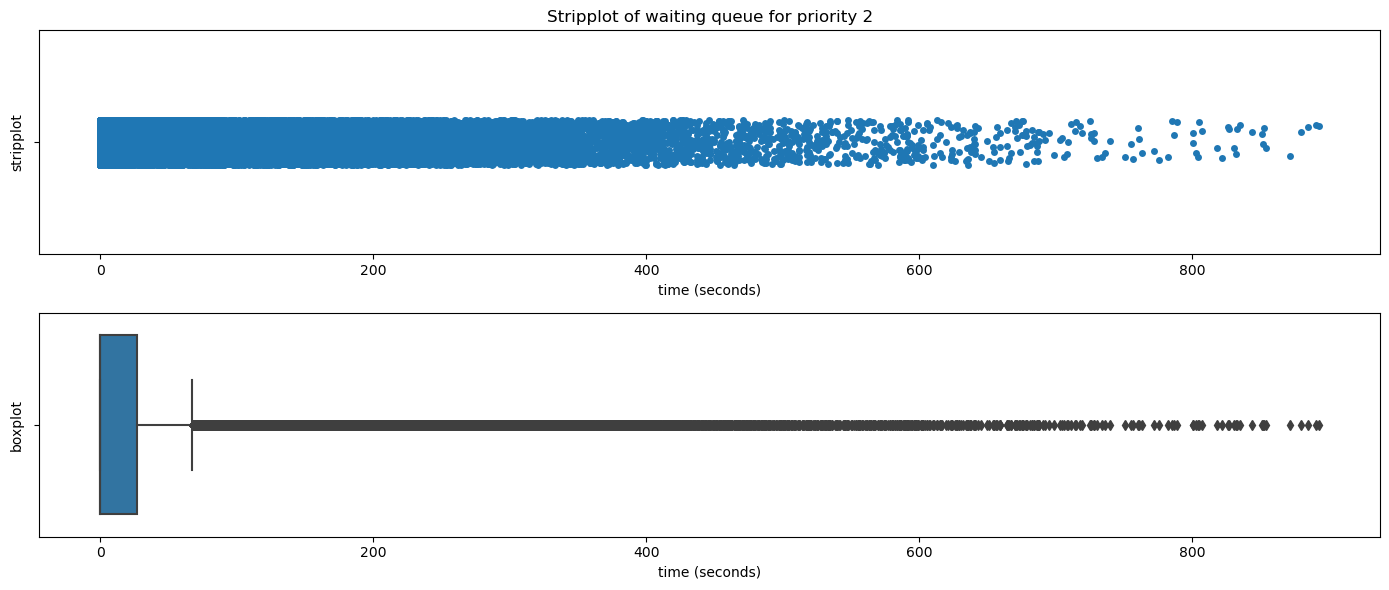

In [134]:
# Se grafican la dispersion de las llamadas y un boxplot a la misma escala que el stripplot y detalle
fig = plt.figure(figsize=(14, 6))

ax1 = fig.add_subplot(211)
sns.stripplot(data=df_priority_2, x='q_time_real', ax=ax1)
ax1.set_xlabel('time (seconds)') ; ax1.set_ylabel('stripplot') ; ax1.set_title('Stripplot of waiting queue for priority 2')

ax2 = fig.add_subplot(212, sharex=ax1)
sns.boxplot(data=df_priority_2, x='q_time_real', ax=ax2)
ax2.set_xlabel('time (seconds)') ; ax2.set_ylabel('boxplot')

plt.tight_layout()

Se observa que de los 135352 clientes que se registraron estuvieron en la cola de espera, el 50% de ellos fue atendido de manera inmediata y el 75% de ellos, estuvo menos de 27 segundos esperando.

### 3.2.2 Clientes prioritarios en tiempo de servicio

In [135]:
df_priority_2['ser_time'].describe()

count    135352.000000
mean        158.970817
std         177.542614
min           0.000000
25%          37.000000
50%         105.000000
75%         216.000000
max        1000.000000
Name: ser_time, dtype: float64

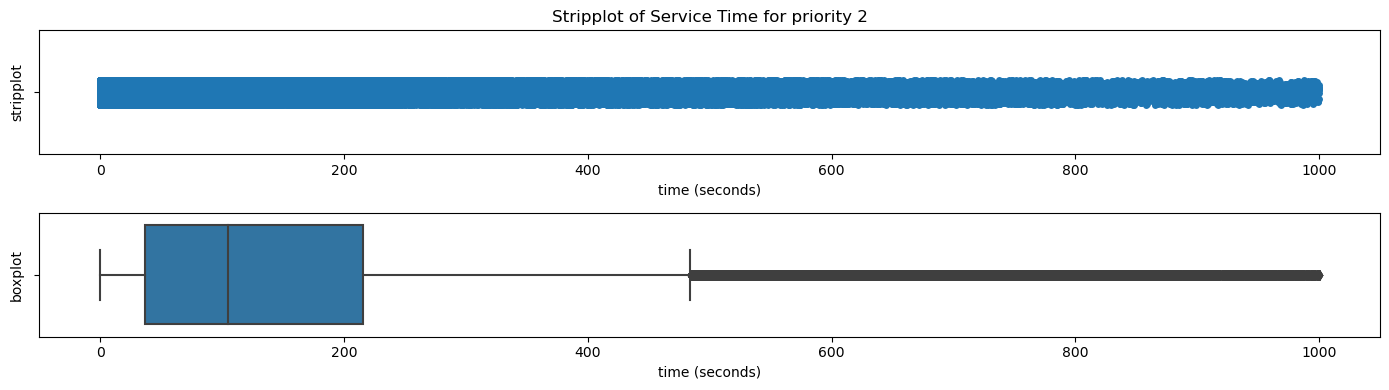

In [136]:
# Se grafican la dispersion de las llamadas y un boxplot a la misma escala que el stripplot y detalle
fig = plt.figure(figsize=(14, 4))

ax1 = fig.add_subplot(211)
sns.stripplot(data=df_priority_2, x='ser_time', ax=ax1)
ax1.set_xlabel('time (seconds)') ; ax1.set_ylabel('stripplot') ; ax1.set_title('Stripplot of Service Time for priority 2')

ax2 = fig.add_subplot(212, sharex=ax1)
sns.boxplot(data=df_priority_2, x='ser_time', ax=ax2)
ax2.set_xlabel('time (seconds)') ; ax2.set_ylabel('boxplot')

plt.tight_layout()

Son atendidos por un operador 132430 clientes prioritarios. De estos, el 75% de ellos, estuvo menos de 218 segundos (3.6 minutos) en el servicio con el operador. En promedio, el servicio dura 160 segundos.

## 3.3 ¿Damos un mejor servicio que a los clientes normales?


Considerando a las categorías 0 y 1 como una única categoría 'normales' y la categoría 2 como 'prioritarios', se puede comparar los tiempos de espera reales en en cola.

In [137]:
# Se agrega una columna al dataframe haciendo las dos categorías de clientes
def label_priority(row):
    if row == 2:
        return 'priority'
    else:
        return 'normal'
    
df['priority_label'] = df['priority'].apply(label_priority)

In [138]:
df.groupby('priority_label')['q_time_real'].agg(['mean'])

,mean
priority_label,
normal,45.767375
priority,32.424486


Se observa que en promedio, los clientes con prioridad estan en cola de espera un 30% menos tiempo que los clientes regulares.

## 3.4 ¿Qué volumen de llamadas atendemos?


In [139]:
# Cantidad de llamadas por mes
avg_montly = df.groupby('month')['month'].agg(['count'])
avg_montly

,count
month,
1,31242
2,33004
3,38338
4,31521
5,38968
6,37498
7,38587
8,41582
9,30821


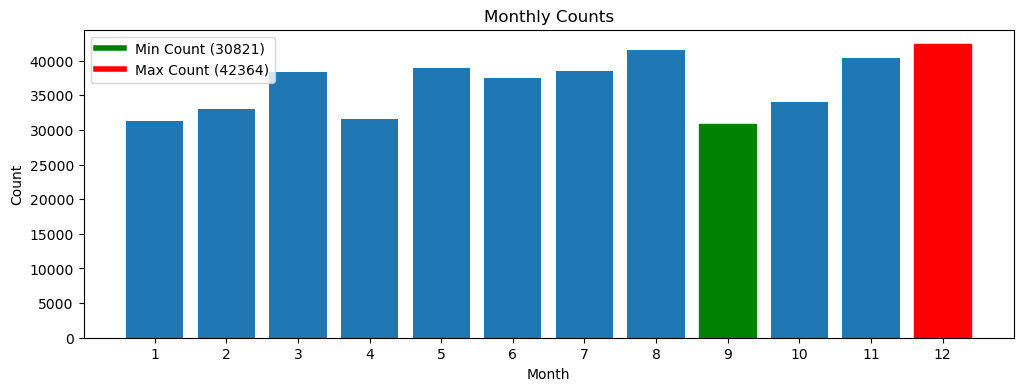

In [140]:
# Cuenta los registros y convierte la estructura
monthly_counts = df.groupby('month')['month'].count()
monthly_counts = monthly_counts.reset_index(name='count')

#Busca máximo y mínimo
min_count = monthly_counts['count'].min()
max_count = monthly_counts['count'].max()

plt.figure(figsize=(12, 4))
bars = plt.bar(monthly_counts['month'], monthly_counts['count'])

# Asigna los colores a máximo y mínimo valor
for bar in bars:
    if bar.get_height() == min_count:
        bar.set_color('green')
    elif bar.get_height() == max_count:
        bar.set_color('red')

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Counts')
plt.xticks(monthly_counts['month'])
plt.legend(handles=[
    plt.Line2D([0], [0], color='green', lw=4, label=f'Min Count ({min_count})'),
    plt.Line2D([0], [0], color='red', lw=4, label=f'Max Count ({max_count})')
])

plt.show()

In [141]:
# Promedio de llamadas mensuales
avg_montly.mean()

count    36533.5
dtype: float64

Tal como ya se vio en el análisis exploratorio, el mes donde ingresaron mayor cantidad de llamados fue diciembre con 42364 llamados. Adicionalmente, se observa que ingresaron en promedio 36533 llamados. Esto supera lo informado inicialmente (20000 a 30000 llamadas).

## 3.5 ¿Cuáles son los cuellos de botella? ¿En qué días? ¿En qué bandas horarias?


Para este punto se considerarán las llamadas que estan clasificadas como AGENT, dado que significa que fueron atendidas por un agente. Se considera que de este modo se tiene en cuenta el punto mas sensible a estudiar porque considera la disponibilidad del recurso humano.

C:\Users\Marco\AppData\Local\Temp\ipykernel_10352\888317086.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['hourly_interval'] = pd.cut((filtered_df['ser_start'] - filtered_df['ser_start'].dt.normalize()) / pd.Timedelta(hours=1),


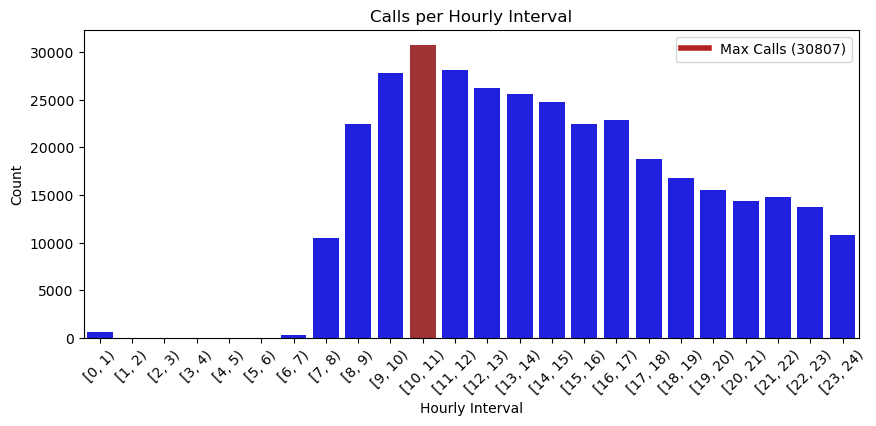

In [142]:
# Filtra las llamadas con etiqueta "AGENT"
filtered_df = df[df['outcome'] == 'AGENT']

# Franjas horarias
filtered_df['hourly_interval'] = pd.cut((filtered_df['ser_start'] - filtered_df['ser_start'].dt.normalize()) / pd.Timedelta(hours=1), 
                                        bins=range(0, 25), right=False)
calls_per_hour = filtered_df['hourly_interval'].value_counts().sort_index()

# Define los dos valores más altos
max_calls_hour = calls_per_hour.idxmax()

#Setea los colores
custom_palette = sns.color_palette(['blue' if x != max_calls_hour else 'firebrick' for x in calls_per_hour.index])

plt.figure(figsize=(10, 4))
sns.barplot(x=calls_per_hour.index, y=calls_per_hour.values, palette=custom_palette)

plt.xlabel('Hourly Interval')
plt.ylabel('Count')
plt.title('Calls per Hourly Interval')
plt.legend(handles=[
    plt.Line2D([0], [0], color='firebrick', lw=4, label=f'Max Calls ({calls_per_hour[max_calls_hour]})')
])

plt.xticks(rotation=45)
plt.show()

C:\Users\Marco\AppData\Local\Temp\ipykernel_10352\1981231345.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['weekday'] = filtered_df['date'].dt.weekday


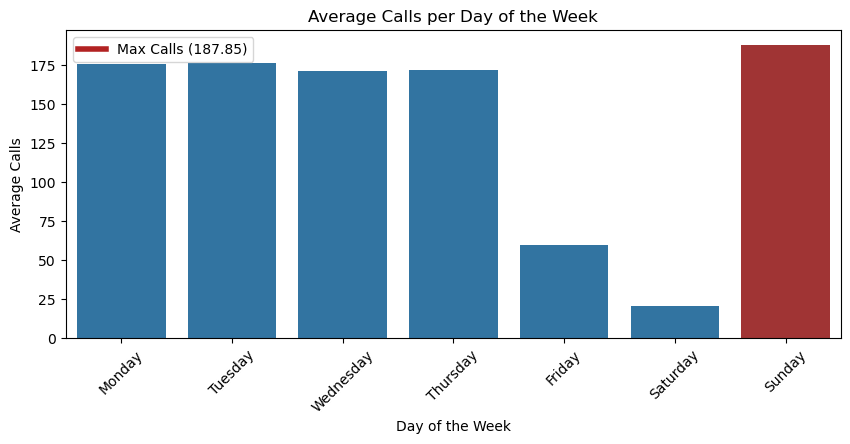

In [143]:
# Filtra las llamadas con etiqueta "AGENT"
filtered_df = df[df['outcome'] == 'AGENT']

# Extrae el día de la semana y calcula el promedio de llamadas
filtered_df['weekday'] = filtered_df['date'].dt.weekday
calls_per_weekday = filtered_df.groupby('weekday')['date'].count() / filtered_df['date'].nunique()

# Etiquetas
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Setea colores
custom_palette = sns.color_palette(['#1f77b4'] * len(calls_per_weekday))
max_calls_weekday = calls_per_weekday.idxmax()
custom_palette[max_calls_weekday] = 'firebrick'

# Crear un gráfico de barras
plt.figure(figsize=(10, 4))
bars = sns.barplot(x=weekday_names, y=calls_per_weekday, palette=custom_palette)

plt.xlabel('Day of the Week')
plt.ylabel('Average Calls')
plt.title('Average Calls per Day of the Week')

plt.xticks(rotation=45)

# OPara setear el color en el máximo
max_calls_value = calls_per_weekday.max()
plt.legend(handles=[
    plt.Line2D([0], [0], color='firebrick', lw=4, label=f'Max Calls ({max_calls_value:.2f})')
])

plt.show()

Tal como se vio en el análisis exploratorio, la franja horaria de las 10 a las 11 horas es donde se atienden mayor cantidad de llamadas (30807 llamadas en promedio), con un comportamiento esperable, creciente desde las am cuando comienzan a atender y a medida que se desarrolla la jornada de los clientes las llamadas aumentan hasta cerca del mediodía y luego decrecen hasta la hora de cierre. 

Por otra parte, los Domingos son los días donde se registran mayor cantidad promedio de llamados (187 llamadas), con un comportamiento constante entre el Domingo y el Jueves y mucho menor los viernes y sábados, lo cuál era esperable dado que esos días el tiempo de atención es muy reducido.

## 3.6 ¿Cómo es la eficiencia y productividad de nuestros agentes?


Debido a que se encontraron grandes inconsistencias en los datos relacionados con los agentes, no se podrá hacer conclusiones sobre la eficiencia y productividad de los mismos, hasta no contar con mas información.

## 3.7 ¿Hay clientes recurrentes en el uso del servicio?


Tal como se vio en el análisis exploratorio, hay clientes recurrentes. En este caso, se considerán las llamadas que recibieron servicio por parte del agente, para analizar la recurrencia del mismo.

Se consideran los siguientes rangos de llamadas por clientes:
* 1: de 1 a 5 llamadas recurrentes
* 2: de 5 a 10 llamdas recurrentes
* 3: de 10 a 50 llamadas recurrentes
* 4: de 50 a 365 llamdas recurrentes
* 5: mas de 365 llamadas recurrentes

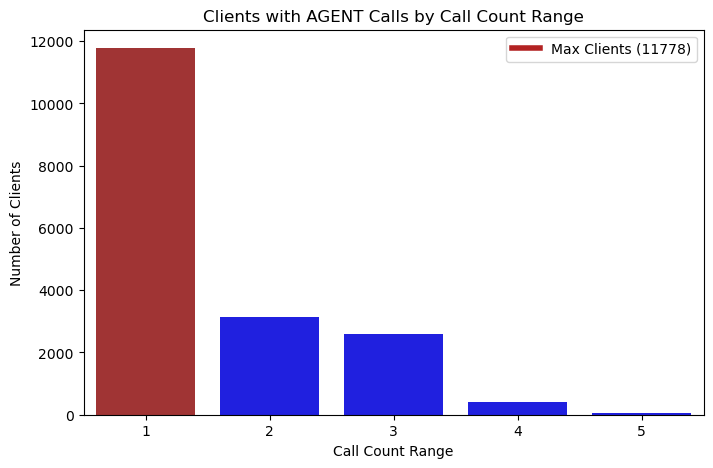

In [144]:
# Filtra las llamadas con la categoría "AGENT" y calcula la cantidad de llamadas por cliente
agent_calls = df[df['outcome'] == 'AGENT']
calls_per_client = agent_calls.groupby('customer_id').size()

# Rangos y etiquetas
bins = [0, 5, 10, 50, 365, float('inf')]
labels = ['1', '2', '3', '4', '5']

# Clasifica a los clientes según los rangos y los cuenta
calls_per_client['call_count_range'] = pd.cut(calls_per_client, bins=bins, labels=labels, right=False)
clients_per_range = calls_per_client['call_count_range'].value_counts().sort_index()

# Calcula el valor máximo y setea el color
max_calls_range = clients_per_range.idxmax()
custom_palette = sns.color_palette(['blue' if x != max_calls_range else 'firebrick' for x in clients_per_range.index])

# Crear un gráfico de barras
plt.figure(figsize=(8, 5))
bars = sns.barplot(x=clients_per_range.index, y=clients_per_range.values, palette=custom_palette)

plt.xlabel('Call Count Range')
plt.ylabel('Number of Clients')
plt.title('Clients with AGENT Calls by Call Count Range')

plt.xticks()
max_calls_value = clients_per_range.max()
plt.legend(handles=[
    plt.Line2D([0], [0], color='firebrick', lw=4, label=f'Max Clients ({max_calls_value})')
])
plt.show()

In [145]:
result_df = pd.DataFrame({
    'Clients': clients_per_range,
    'Percentage': round(((clients_per_range / clients_per_range.sum()) * 100),2)
})
result_df

,Clients,Percentage
1,11778,65.45
2,3153,17.52
3,2598,14.44
4,416,2.31
5,50,0.28


Se puede ver que el 65% de los clientes que fueron atendidos por un agente hicieron entre 1 y 5 llamadas en el período analizado. Un 32% llamaron entre 5 y 50 veces, casos que se podrían estudiar en profundidad para ver el motivo de la recurrencia. Finalmente, el 0.28% de los clientes llamaron mas de 365 veces, lo que no parece lógico y podría indicar algún problema con el sistema.

## 3.8 ¿Cuáles son los tipos de servicio más recurrentes?


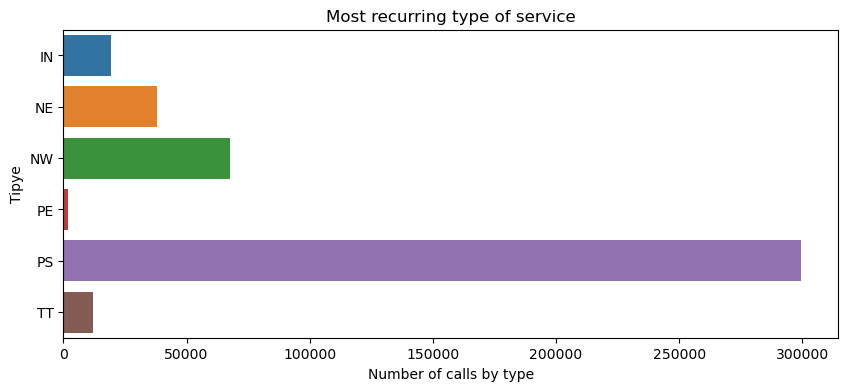

In [150]:
cantidad = df['type'].value_counts()

fig = plt.figure(figsize=(10, 4))
sns.barplot(x=cantidad.values, y=cantidad.index)
plt.xlabel('Number of calls by type') ; plt.ylabel('Tipye') ; plt.title('Most recurring type of service')
plt.show()

In [155]:
result_df = pd.DataFrame({
    'Count': df['type'].value_counts(),
    'Percentage': (cantidad / cantidad.sum()) * 100
})
round(result_df, 2)

,Count,Percentage
PS,299679,68.36
NW,67495,15.40
NE,38030,8.67
IN,19220,4.38
TT,12189,2.78
PE,1789,0.41


La categoría PS, que significa Actividad Regular, es ampliamente la mas recurrente, correspondiendo al 68% de las llamadas registradas. Las categorías NW y NE correspondientes a Prospectos y Actividad por Acciones, están presentes en el 24% de llamadas registradas.

## 4. Conclusiones y recomendaciones

Para finalizar, se repasan las principales conclusiones que responden a las preguntas de negocio planteadas en primera instancia. Claramente, se puede profundizar en algunas de ellas en próximas etapas y en función de las necesidades que puedan plantear los interesados. 

* **Nivel de servicio a clientes prioritarios**: El 50% de los clientes prioritarios dueron atendidos de inmediato y el 75% estuvo menos de 27 segundos en cola de espera.
* **Calidad de servicio a clientes prioritarios**: A parte de que tienen ventaja al momento de ingresar a la cola de espera, adicionando tiempo de espera para adelantarse a la cola, se pudo observar que el 75% de ellos resolvió el llamado con un operador en menos de 218 segundos (casi 4 minutos), con un tiempo promedio de 160 segundos.
* **volumen de llamadas**: Se atienden 36533 llamados promedio por mes, siendo el mes de diciembre el mes con mayor cantidad de llamados (42364 llamados) y un mínimo de 30521 registrado. 
* **cuellos de botella**: Se encontró un comportamiento esperado del ingreso de llamadas durante la semana y las bandas horarias, viendo picos de demanda el día Domingo, cantidad de llamadas constantes de Domingo a Jueves (debido a que es son los días de mayor rango horario de atención). En cuanto a las bandas horarias, se observó un crecimiento en la cantidad de llamadas desde la apertura de la atención hasta el cierre, con un máximo entre las 10 y 11 de la mañana.
* **Eficiencia y productividad de los agentes**: No se pudo evaluar este punto por la gran inconsistencia de los datos.
* **Clientes recurrentes en el uso del servicio**: Se encontró que el 65% de los clientes fueron atendidos por un agente entre 1 a 5 veces en todo el período analizado. Un 32% de los clientes realizaron llamados entre 5 a 50 veces y una porción muy pequeña, de 0.28% se registran con mas de 365 consultas. Éste último puede dar indicios de problemas en el registro del nombre de cliente.
* **Tipos de servicio más recurrentes**: Como es de esperar, el 68% de los clientes son atendidos por Actividades Regulares. Cerca de un 25% también solicitan atención por temas de consultas que lo hacen potenciales clientes o por Actividades por Acción.

Se dan las siguientes recomendaciones:

* Mejorar la calidad de los datos para la variable *Server*, dado que con ella se pueden hacer análisis muy valiosos sobre la calidad de atención.
* Analizar la recurrencia de las llamadas para clientes que llaman las de 50 veces en el año.
* Analizar los tiempos de espera de los clientes prioritarios a lo largo del día en relación con los agentes disponibles para la atención para determinar si es necesario planificar mas agentes en alguna franja en particular.
* Analizar las causas del alto porcentaje de llamados que llegan a la cola de espera pero abandonan en VRU.
* Registrar la calidad de la atención por parte de los clientes.

Se adjunta al presente análisis, un Dashboard con la siguiente información para el monitoreo de la calidad del servicio:

* **Total de llamadas entrantes a VRU**: cuenta todas las llamadas que ingresan al sistema.
* **Total de llamadas servidas por un agente**: son aquellas llamadas se clasifican como AGENT en la variable *Outcome*.
* **Tasa de abandono en cola de espera**: son aquellas llamadas que pasan a la cola de espera (q_time) pero que abandonan la llamada (q_time = 00:00:00).
* **Promedio de servicio por llamadas (segundos)**: es el promedio del tiempo de aquellas llamadas que son atendidas por un agente (ser_time).
* **Promedio de espera en cola (segundos)**: es el promedio del tiempo de llamadas que permanecen en la cola de espera (q_time_real), descontando en el tiempo la ventaja de los clientes con prioridad.
* **Cantidad de llamadas por prioridad de cliente**: es un gráfico de dona que permite visualizar la cantidad de llamadas clasificadas como cada una de las prioridades de clientes. Este gráfico sirve de filtro para los KPI y demás gráficos.
* **Cantidad de llamadas ingresadas durante la semana por prioridad**: gráfico de columnas apiladas que muestran la proporción de las llamadas en cada día de la semana en función de la prioridad de los clientes.
* **Tipo de servicio recurrente**: treemap que muestra la proporción del tipo de servicio brindado a los llamados.

A continuación, se muestra el Dashboard:

<img src="image/Dashboard.png">